# (Ford GoBike)
## by (Joseph Riad)

## Preliminary Wrangling

> In this project we are going to invistigate a dataset that contains data for ford bikes service called GoBike which is a share system for bikes in the us 
the data contains durations for the rides , locations (start and end) , gender , date of birth and some other data with more than 180000 rows 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
149634,121,2019-02-06 19:08:27.7970,2019-02-06 19:10:29.0890,121.0,Mission Playground,37.759210,-122.421339,133.0,Valencia St at 22nd St,37.755213,-122.420975,4635,Subscriber,1985.0,Male,No
116857,401,2019-02-12 07:05:28.3540,2019-02-12 07:12:09.9630,189.0,Genoa St at 55th St,37.839649,-122.271756,176.0,MacArthur BART Station,37.828410,-122.266315,4565,Subscriber,1975.0,Male,No
17754,2099,2019-02-26 20:18:23.7010,2019-02-26 20:53:23.5310,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,349.0,Howard St at Mary St,37.781010,-122.405666,4653,Subscriber,1992.0,Male,No
31105,434,2019-02-24 17:34:41.2520,2019-02-24 17:41:55.9540,58.0,Market St at 10th St,37.776619,-122.417385,350.0,8th St at Brannan St,37.771431,-122.405787,4466,Subscriber,1993.0,Other,No
117096,691,2019-02-12 05:50:41.9550,2019-02-12 06:02:13.1640,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5269,Subscriber,1966.0,Male,No


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.start_station_id.nunique()

329

In [9]:
df.end_station_id.nunique()

329

In [10]:
df.bike_id.nunique()

4646

### What is the structure of your dataset?

> The dataset comes with a 183412 observations (rows) with 16 variables (columns) for a ford go bike share system with locations of start and end stations of 329 stations with 4646 bikes 

### What is/are the main feature(s) of interest in your dataset?

> Duration time as it can be used to see the patterns regarding time of renting 
> Start and end station locations 
> Time to extract data from it regarding month , day of week , hours 
> **I think it would be great to see if factors like age , gender , location , time and user type can affect the duration of the rental**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time,end_time,start_station_name , end_station_name,user_type, member_birth_year and member_gender will be a real help to invistigate and explore

## Univariate Exploration

### 1- Duration

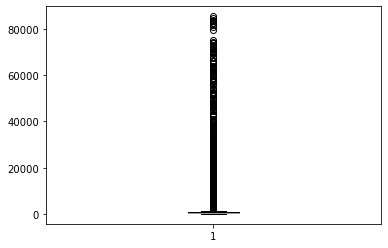

In [11]:
# plotting a box blot to assess the data (essentially looking for the 5 number analysis visually and to grasp the outliers)
plt.boxplot(data = df , x = 'duration_sec' );

It is clear that there are outliers  present in the data and can affect the quality greatly 
to be sure i will use a bar chart to see more clearly as the box chart is so dense 

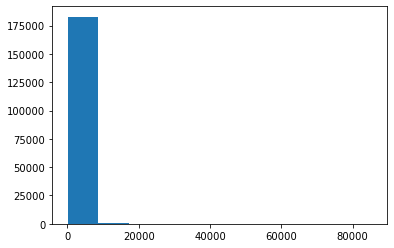

In [12]:
# further looking using the bar chart
plt.hist(data = df , x = 'duration_sec' );

>**Again the visuals indicate outliers it is better to check programmarly**

The observation was right there are some outliers that are affecting the visuals and the data it is best to remove them from our data set 
to do this with a good representation of the data i will use the numpy percentile function to get the max percentage of the data without outliers 
   >I will use the numpy percentile function with **95% , 99% , 99.5%** to get the max percentage of the data without outliers   

In [13]:
# determining what is the Max interval of the data that can execlude outliers and keep the data relevant 
a = np.percentile(df.duration_sec,95)
b = np.percentile(df.duration_sec,99)
c = np.percentile(df.duration_sec,99.5)
print ('For 95% of the data number of minutes is {a} , for 99 is {b} and {c} for 99.5 percent of the data '.format(a = a , b=b,c=c))

For 95% of the data number of minutes is 1571.0 , for 99 is 3458.889999999985 and 5936.945000000007 for 99.5 percent of the data 


we would go with the nearest multiplication of 60 sec (1 minute) which is 6000 (100 Min) as a max

In [14]:
# proportion of rides longer that 6000 seconds which accounts to around 99.5 percent of the data 
p = np.round (1-(len(df[df.duration_sec>6000])/len(df)), 4)
p

0.995

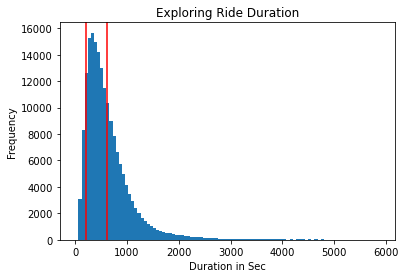

In [15]:
# lets have a look on the duration with limit to 6000 sec 
# assigning bins to 60 seconds intervals with the max at 99.5% of the data
bins = np.arange(0,c,60)

# Plotting the graph
plt.hist(data = df , x = 'duration_sec' , bins = bins );

# polishing the graph with labels and titles 
plt.xlabel("Duration in Sec");
plt.ylabel("Frequency");
plt.title("Exploring Ride Duration");

# adding visuals to the graph at 10 and 60% of the data (50% of the data) with some colors and lines
plt.axvline(np.percentile(df.duration_sec,10),color = 'red');
plt.axvline(np.percentile(df.duration_sec,60), c='r');

> This is much better and it is now clear and more relevant 
> it seems most of the rides are betweeen 214 and 608 seconds 


>In order to continue the exploration some cleaning is required also some new columns might be needed  
     >in the next section we will start this process 


### 2- Age

In [16]:
#create a clean copy of the original data to do our preparation 
df_clean = df.copy()

##### Adding a new Column for (Age)

In [17]:
# adding age to the data frame 
df_clean['age']=2021-df_clean['member_birth_year']

In [18]:
# finding null values 
df_clean.age.isnull().sum()

8265

In [19]:
# a fast look over the data 
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,36.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,29.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,34.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,41.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000


In [20]:
# filling na values with zeroes to convert age to integer values 
df_clean.age = df_clean.age.fillna(0)
df_clean.age = df_clean.age.astype('int')

In [21]:
# checking the conversion and the filling 
len(df_clean.query("age == 0"))

8265

In [22]:
#checking nulls
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
age                           0
dtype: int64

In [23]:
# checking for outliers small ages (the zeroes)
len(df_clean.query("age <20 "))

8265

In [24]:
# checking for outliers old ages over 70 
len(df_clean.query("age >70 "))

852

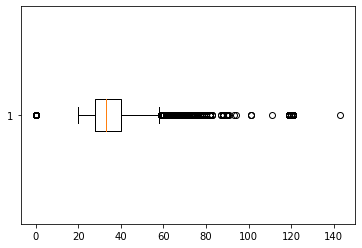

In [25]:
# plotting the data 
plt.boxplot(data = df_clean , x = 'age' , vert = False);

As we can see the ages are mostly between 20 and 60 years 


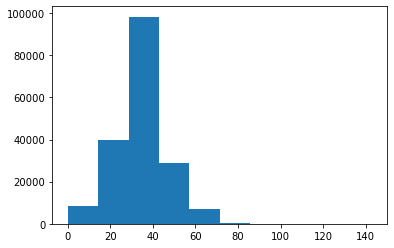

In [26]:
# plotting the data as hist 
plt.hist(data = df_clean , x = 'age'  );

from the graphs it seems that most of the data fall between 20 to 60 years with average around 35 years old 
it is better to remove outliers again to keep the data clean there are People over 140 years there 

In [27]:
# removing above 60 and less than 20 from the data fram 
df_clean = df_clean.query("age <61 & age >20")

In [28]:
# View The data frame 
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38


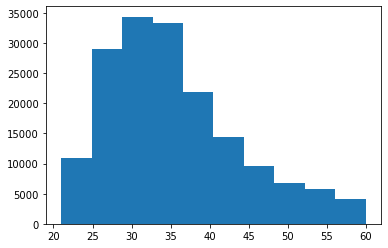

In [29]:
# replotting the age after removing outliers 
plt.hist(data = df_clean , x = 'age' );

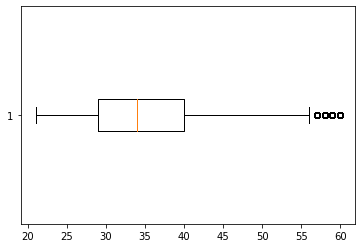

In [30]:
# replotting the box graph after removing outliers 
plt.boxplot(data = df_clean , x = 'age' , vert = False);

It is much easier to see now that ages are starting from 20 to 60 with median around 35 and that most of the users are in 30 - 40 which further suggests that this is due to working travels 

> ###   Age Grouping

In [31]:
# creating age groups for easier and categorical representation 
# using pandas cut datafram with our assigned data bins 
age_bins = [20, 30, 40, 50, 61]
age_labels = ['20 - 30', '30 - 40', '40 - 50', '50 - 60']

# assigning the right to false to remove the upper limit as we created bins with one year older for the last bin 
df_clean['age_group'] = pd.cut(df_clean['age'], bins = age_bins, labels = age_labels, right = False)


In [32]:
# viewing a sample 
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group
97954,623,2019-02-15 08:22:48.9880,2019-02-15 08:33:12.7250,85.0,Church St at Duboce Ave,37.770083,-122.429156,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4369,Subscriber,1987.0,Male,No,34,30 - 40
11618,879,2019-02-27 18:18:51.1070,2019-02-27 18:33:30.8430,350.0,8th St at Brannan St,37.771431,-122.405787,121.0,Mission Playground,37.759210,-122.421339,4991,Subscriber,1989.0,Male,No,32,30 - 40
127823,2969,2019-02-10 14:07:42.8980,2019-02-10 14:57:11.9270,377.0,Fell St at Stanyan St,37.771917,-122.453704,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,4986,Subscriber,1996.0,Female,No,25,20 - 30
50951,223,2019-02-21 18:35:08.8080,2019-02-21 18:38:52.4270,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,61.0,Howard St at 8th St,37.776513,-122.411306,6235,Subscriber,1987.0,Male,No,34,30 - 40
29798,326,2019-02-25 06:25:49.2600,2019-02-25 06:31:15.4190,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,5116,Subscriber,1989.0,Female,No,32,30 - 40
86853,527,2019-02-17 11:39:38.1400,2019-02-17 11:48:25.7910,50.0,2nd St at Townsend St,37.780526,-122.390288,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6295,Customer,1988.0,Male,No,33,30 - 40
159954,136,2019-02-05 17:36:07.4200,2019-02-05 17:38:23.9190,108.0,16th St Mission BART,37.764710,-122.419957,122.0,19th St at Mission St,37.760299,-122.418892,5530,Subscriber,1987.0,Male,No,34,30 - 40
34837,331,2019-02-23 21:15:50.3140,2019-02-23 21:21:21.6950,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,58.0,Market St at 10th St,37.776619,-122.417385,4936,Subscriber,1983.0,Male,No,38,30 - 40
82220,535,2019-02-18 10:57:10.3650,2019-02-18 11:06:05.8830,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,356.0,Valencia St at Clinton Park,37.769188,-122.422285,3151,Customer,1964.0,Male,No,57,50 - 60
118149,413,2019-02-11 19:23:33.3910,2019-02-11 19:30:26.6250,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,5484,Subscriber,1991.0,Male,No,30,30 - 40


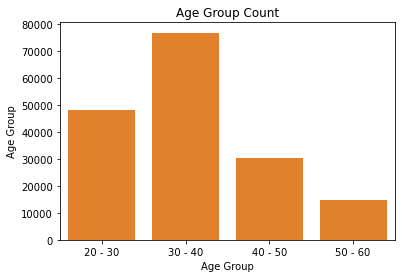

In [33]:
# plotting data for user groups 
# removing unwanted colors by usnig seaborne palette function
sb.countplot(data = df_clean , x = 'age_group' , order =['20 - 30', '30 - 40', '40 - 50', '50 - 60'] ,color = sb.color_palette()[1]);
plt.title('Age Group Count')
plt.xlabel('Age Group')
plt.ylabel('Age Group')
plt.show()

The data here shows that most users are in 30 to 40 then the 20 to 30 years 

i think this has to do with working so i will find the most rides for weekends vs weekdays 

### 3- Gender 

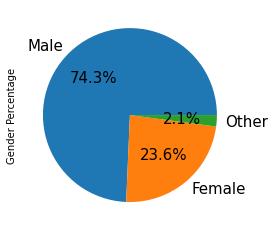

In [34]:
# Plotting Gender data in the data set 
# as gender are only 3 unique values ( male - female - other)
# using a pie chart is a very good option for visual 

df_clean.member_gender.value_counts().plot(kind = 'pie' ,autopct="%.1f%%" , fontsize = 15 , label = "Gender Percentage");

### 4- User Type 

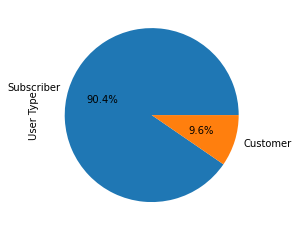

In [35]:
# again this data is for user type which is either a customer or a subscriber 
# using pie chart is a very good option here 
# adding some polishing like the percentage and the labels also help to view it and perceive the data clearly 
df_clean.user_type.value_counts().plot(kind = 'pie' ,autopct="%.1f%%" , fontsize = 10 , label = "User Type"  );

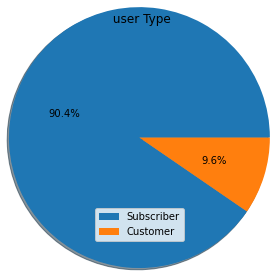

In [36]:
# to further make the data more readable using matplotlib is more refined option 
# and gives better visual 

plt.pie(df_clean['user_type'].value_counts(), autopct='%.1f%%',shadow=True, radius=1.5 );
plt.title(" user Type")
plt.legend(df_clean['user_type'].unique()[::-1], loc="lower center")
plt.show()

from the previous graphs for the user types in the data set we can see clearly that most 

<AxesSubplot:xlabel='user_type', ylabel='count'>

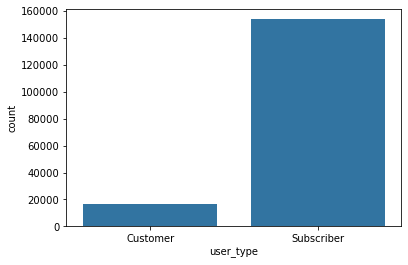

In [37]:
sb.countplot(data = df_clean , x = 'user_type' , color= sb.color_palette()[0])

### 5 -Common stations 

**Create graphs for the most common starting and ending stations**

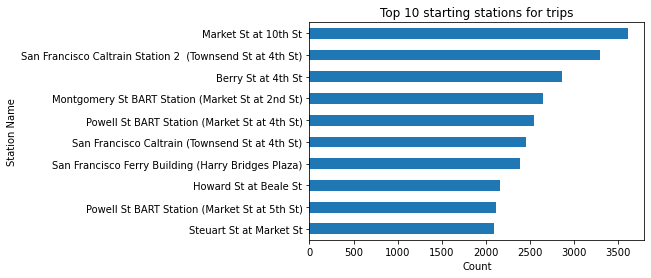

In [38]:
# plotting the most common 10 starting stations
top_names = df_clean.start_station_name.value_counts()[0:10].sort_values()
top_names.plot(kind = 'barh')
plt.title('Top 10 starting stations for trips')
plt.xlabel('Count')
plt.ylabel('Station Name');

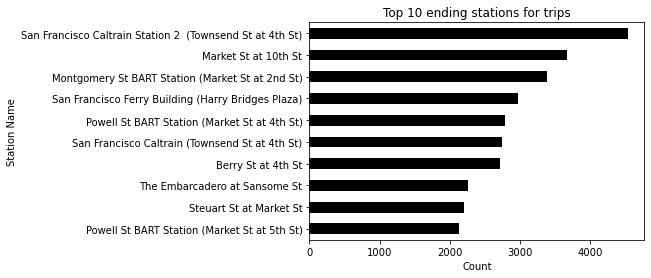

In [39]:
# plotting the most common 10 starting stations
top_names = df_clean.end_station_name.value_counts()[0:10].sort_values()
top_names.plot(kind = 'barh',color = 'black')
plt.title('Top 10 ending stations for trips')
plt.xlabel('Count')
plt.ylabel('Station Name');

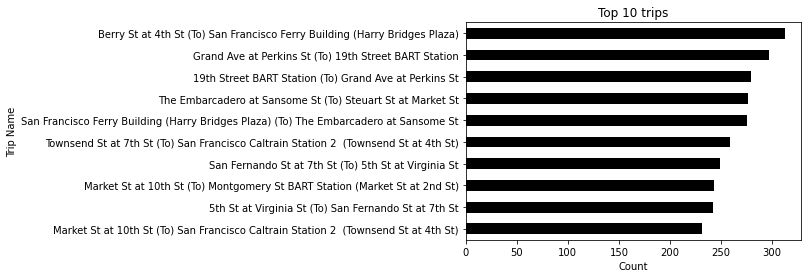

In [40]:
# plotting the most used 10 trips 
common_trip = (df_clean['start_station_name'] + ' (To) ' + df_clean['end_station_name']).value_counts()[0:10].sort_values()
common_trip.plot(kind = 'barh',color = 'black')
plt.title('Top 10 trips')
plt.xlabel('Count')
plt.ylabel('Trip Name');

### 6- Time 

In [41]:
# creating a test and then commit to the original datafram 
#dft = df_clean.copy()
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [42]:
# extract month name from start_time column 
# found code online it is very helpful i tweaked a bit but it is great
df_clean['st_month_name']=df_clean['start_time'].dt.strftime('%B')

# extract month number from start_time column
#df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

# extract weekdays from start_time column
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

# extract day from start_time column
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

# extract hour from start_time column
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [43]:
# extract month name from end_time column 
df_clean['e_month_name']=df_clean['end_time'].dt.strftime('%B')

# extract month number from end_time column
#df_clean['start_time_month']=df_clean['end_time'].dt.month.astype(int)

# extract weekdays from end_time column
df_clean['end_time_weekday']=df_clean['end_time'].dt.strftime('%a')

# extract day from end_time column
df_clean['end_time_day']=df_clean['end_time'].dt.day.astype(int)

# extract hour from end_time column
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [44]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,age_group,st_month_name,start_time_weekday,start_time_day,start_time_hour,e_month_name,end_time_weekday,end_time_day,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,37,30 - 40,February,Thu,28,17,March,Fri,1,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,49,40 - 50,February,Thu,28,12,March,Fri,1,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,32,30 - 40,February,Thu,28,17,March,Fri,1,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,47,40 - 50,February,Thu,28,23,March,Fri,1,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,38,30 - 40,February,Thu,28,23,March,Fri,1,0


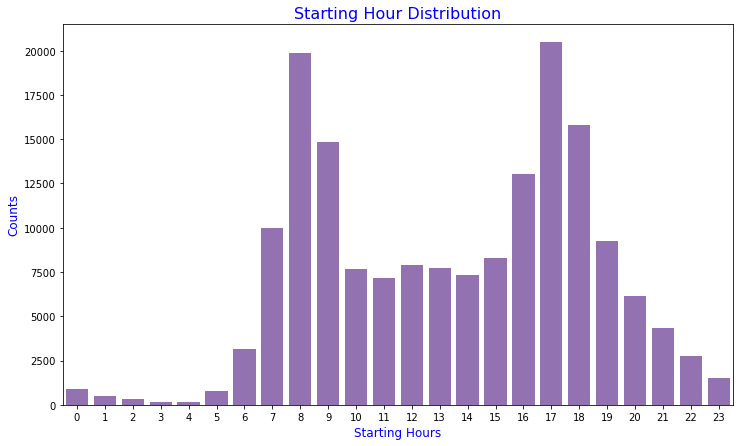

In [45]:
# plotting the stating hour to find the most common hours  
plt.figure(figsize=(12,7))

sb.countplot(data=df_clean, x='start_time_hour', color= sb.color_palette()[4])
plt.xlabel('Starting Hours', fontsize=12,color = 'b')
plt.ylabel('Counts', fontsize=12,color = 'b')
plt.title('Starting Hour Distribution', fontsize=16 , color = 'b');

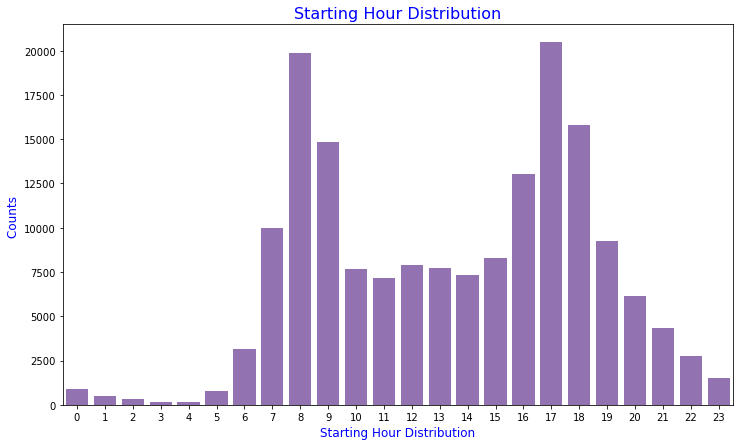

In [46]:
# plotting the ending hour to find the most common hours  
plt.figure(figsize=(12,7))
sb.countplot(data=df_clean, x='start_time_hour', color=sb.color_palette()[4])
plt.xlabel('Starting Hour Distribution', fontsize=12, color = 'b')
plt.ylabel('Counts ', fontsize=12, color = 'b')
plt.title('Starting Hour Distribution', fontsize=16, color = 'b');

As expected the two are almost identical on this scale as most of the trips falls under one hour 

   >**However we find that this model is a bimodal distribution with two peaks around 8 am and 5 pm which strongly suggest this behavior to the working hours as we suspected from the age groups also** 

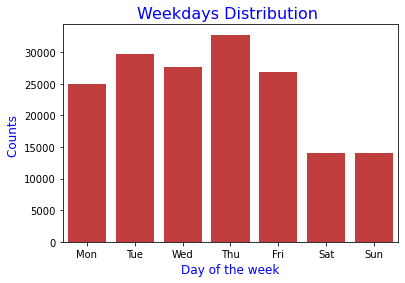

In [47]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.countplot(data=df_clean, x='start_time_weekday',    color = sb.color_palette()[3], order = weekday)
plt.xlabel('Day of the week', fontsize=12, color = 'b')
plt.ylabel('Counts ', fontsize=12, color = 'b')
plt.title('Weekdays Distribution ', fontsize=16, color = 'b');

**It is now clear as the lowest days are the weekend which supports our assumption**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>1 - **Duration**
    the distribuion was at first unreadable because of the outliers after some editng on the points of data while still including 99.5% of the observations the outliers were removed and the unusual points were gone 
    
>2- **Age & Age Groups**
     at first i needed to create the 'age' column (2021-year) and to my surprise there was people aged at around 140 years which is impossible (or we need to call guiness world records :) ) so after some calculation and null removal the final data contained people with ages from 20 to 60 which was almost around 98 percent of the original with the majority of it being the working class of 20 to 40 years old
     
>3- **Gender**
     we have three options here (male - female - other) the calculations were easy as the data was ready after the plotting it was clear that most of the users are males with 74.3 % while females were 23.6 % only 
     
>4- **User type**
     user types either customers or subscribers and it was clear that subscribers are the majority of the users with 90.4% vs 9.6% for the customers 
     
>5- **Common starting , Ending and trips** 
     plotting 10 most common starting , ending and whole trip didnot produce any useful insights but at least there was nothing alarming 
     
>6- **Common hours** 
  this proved useful in strengthing the assumption of the working hours as it produced a two almost identical for start and end around working hours peak rushes (7-8 a.m and 5-6 p.m) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes the bimodal distribution of the starting hours was unsual at first but later it made perfect sense also calculations for adding age and filtering outliers , producing the whole trip , extracting hours for visual most common start and end hours 

## Bivariate Exploration


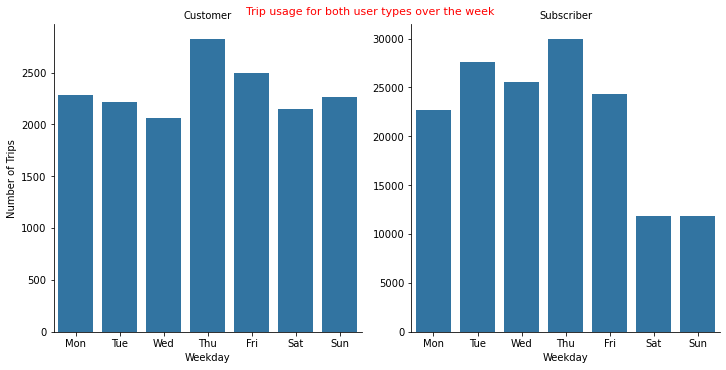

In [48]:
# comparing Weekday number of trips with user type 
# sharey is false as it was a huge difference in scale 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count',   sharey = False,    color = sb.color_palette()[0], order = weekday)
g.set_axis_labels("Weekday", "Number of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Trip usage for both user types over the week', fontsize=11 , color = 'r');

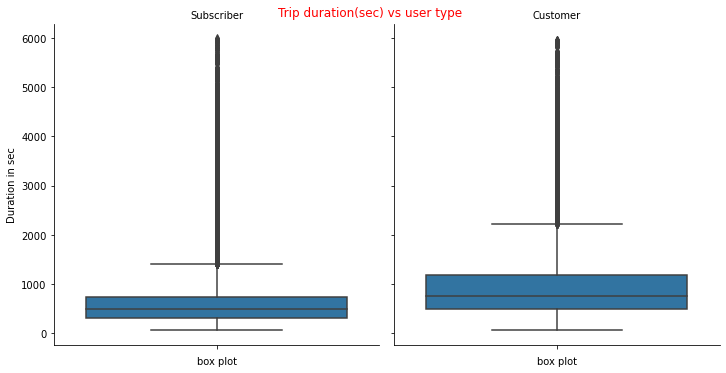

In [49]:
# plotting a box plot for trip duration in sec vs user type 
# removing outliers again in the duration 
# i have kept them as they can express a niche segemntation that we can address later
df_6000= df_clean.query("duration_sec < 6000 ")
g = sb.catplot(data=df_6000, y='duration_sec', col="user_type", kind='box')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("box plot", "Duration in sec")
g.fig.suptitle('Trip duration(sec) vs user type', fontsize=12, color = 'r');

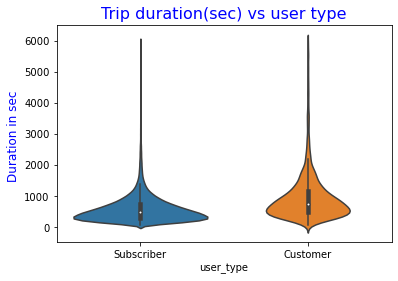

In [50]:
# plotting a violin plot for trip duration in sec vs user type 
sb.violinplot(x = df_6000.user_type , y = df_6000.duration_sec );
plt.ylabel('Duration in sec ', fontsize=12, color = 'b')
plt.title('Trip duration(sec) vs user type', fontsize=16, color = 'b');


it is visible here that subscribers usage median is in the 500 sec and trailing off towards the 1000 sec with a more sharp decline than the customer plot which shows that the customers tend to take longer trips and also with smaller decline when trailing off at the 2000 sec. 

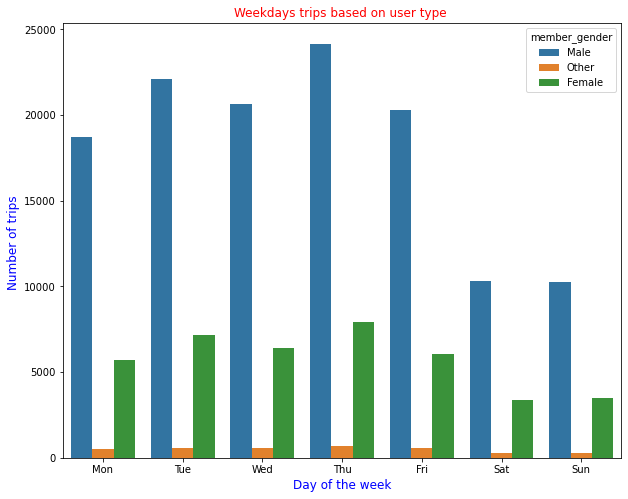

In [51]:
plt.figure(figsize = (10,8))

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.countplot(data=df_clean, x='start_time_weekday',   hue = 'member_gender' , order = weekday)
plt.xlabel('Day of the week', fontsize=12, color = 'b')
plt.ylabel('Number of trips ', fontsize=12, color = 'b')
plt.title('Weekdays trips based on user type ', fontsize=12, color = 'r');

No indication on females or males favouring any day particulary and the plot is in line with the findings of the weekends having fewer users for both genders 

In [52]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,age_group,st_month_name,start_time_weekday,start_time_day,start_time_hour,e_month_name,end_time_weekday,end_time_day,end_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,37,30 - 40,February,Thu,28,17,March,Fri,1,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,49,40 - 50,February,Thu,28,12,March,Fri,1,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,32,30 - 40,February,Thu,28,17,March,Fri,1,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,47,40 - 50,February,Thu,28,23,March,Fri,1,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,38,30 - 40,February,Thu,28,23,March,Fri,1,0


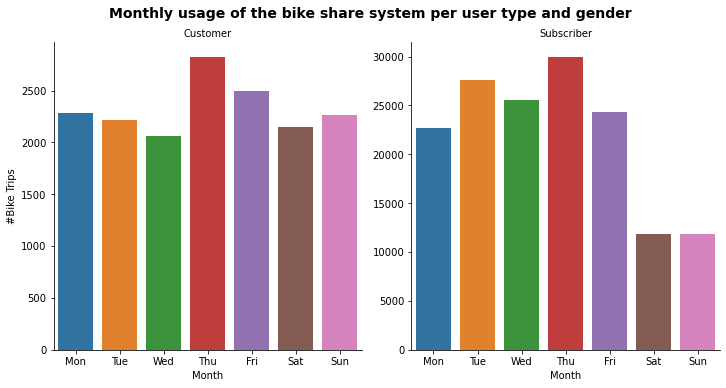

In [53]:
# monthly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False  , order = weekday)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers tend to use the service for working days while customers prefer weekends 
Customers use the service for more duration than Subscribers on average with more towards outliers 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Not really but i think i will keep my eye on the females behaviour 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

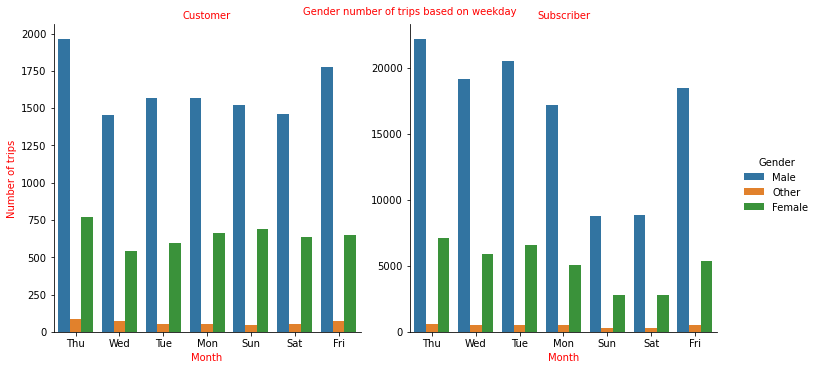

In [54]:
# monthly usege of the bike sharing system per user type and gender
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "Number of trips", c='r')
g._legend.set_title('Gender')
g.set_titles("{col_name}", color='r')
g.fig.suptitle('Gender number of trips based on weekday', fontsize=10, c='r');

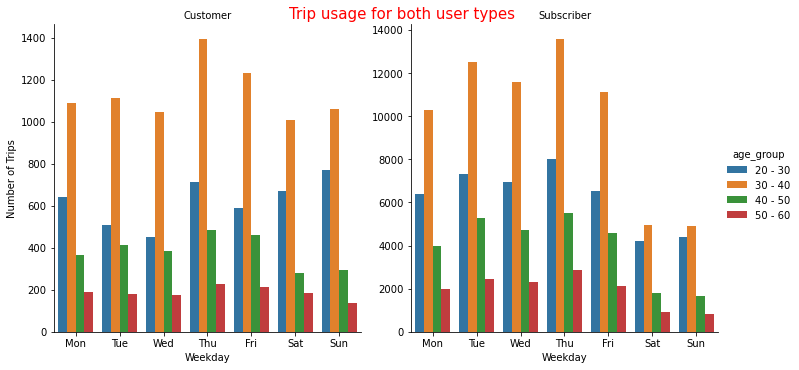

In [55]:
# comparing Weekday number of trips with user type 
# sharey is false as it was a huge difference in scale 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue = 'age_group',kind='count',   sharey = False,  order = weekday)
g.set_axis_labels("Weekday", "Number of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Trip usage for both user types', fontsize=15 , color = 'r');

Through out the weekend customers from 20-40 are using the service more than subscribers while on working days this is not the case 

age usage is also visible as they tend to not use the service through the weekend wheather he is subscriber or customer 

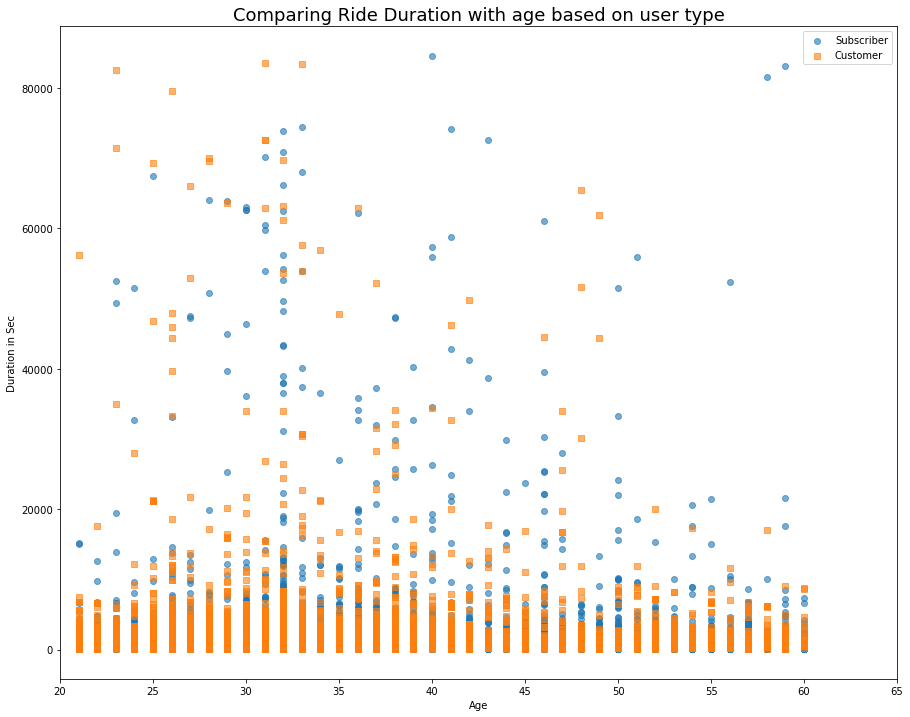

In [56]:
plt.figure(figsize = (15,12))

cat_markers = [['Subscriber', 'o'],
               ['Customer', 's'],
               ]

for cat, marker in cat_markers:
    df_gender = df_clean[df_clean['user_type'] == cat]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_sec', marker = marker, alpha = .6);
plt.legend(['Subscriber', 'Customer']);
plt.xlim(20, 65);

plt.title('Comparing Ride Duration with age based on user type', fontsize = 18);
plt.xlabel('Age');
plt.ylabel(' Duration in Sec ');

As the age increases the trip duration somehow decreases but the most important is that it  is also affected by the user type as it indicates a rverse relation between duration and age for the customers more clearly 

it is also clear that in the longer duration specially when nearing the outliers the customers increase and almost equal the subscribers volume 

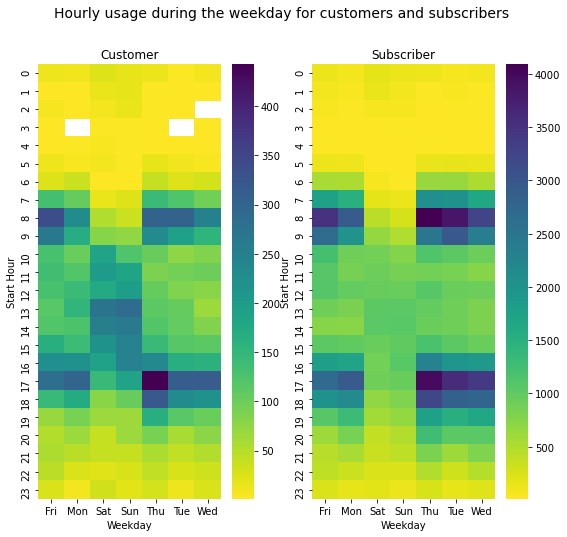

In [57]:
# plottting multivars 

plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14)

# heatmap for customers
# assign subplot 
plt.subplot(1, 2, 1)
# plotting using quering the data then grouping it by weekday and start time resetting index then pivot the data 
sb.heatmap(df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index().pivot("start_time_hour", "start_time_weekday", "bike_id")
, cmap="viridis_r")

plt.title("Customer")
plt.xlabel('Weekday')
plt.ylabel('Start Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
#  again plotting using quering the data then grouping it by weekday and start time resetting index then pivot the data 

sb.heatmap(df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index().pivot("start_time_hour", "start_time_weekday", "bike_id")
, cmap="viridis_r")

plt.title("Subscriber")
plt.xlabel('Weekday')
plt.ylabel('Start Hour');

here it is clear that most of the customers are more active than subscribers on weekends which further suggest why they dont subscribe 
while it is visible that during the rest of the week at the rush hour it is used intensivly by the subscribers 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> it is now clear that users of this service are either everday workers who are also subscribers and customers who on the vacation use the service so they don't need to subscribe 
when plotting the heat map all the variables from uni and Bi came together to form the picture clearly 

### Were there any interesting or surprising interactions between features?

> The females were on the same pattern like males even though bikes are associated with males mostly yet females regualry use the service through the week in the same pattern as the males which was unexpected as well as their proportion of almost 25% in the data 